In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

In [2]:
df=pd.read_excel("1730285881-Airbnb_Open_Data.xlsx")

In [3]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,193.0,10.0,9.0,2021-10-19,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,28.0,30.0,45.0,2022-05-21,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,124.0,3.0,0.0,NaT,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,74.0,30.0,270.0,2019-07-05,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,41.0,10.0,9.0,2018-11-19,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102329 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102191 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

In [5]:
df.isnull().sum()

id                                     0
NAME                                 270
host id                                0
host_identity_verified               289
host name                            408
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

In [6]:
df.duplicated().value_counts()

False    102058
True        541
Name: count, dtype: int64

In [7]:
df[df["neighbourhood group"]=="brookln"]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
13,1008516,"Lovely Room 1, Garden, Best Area, Legal rental",26802410424,verified,Darcy,brookln,South Slope,40.66829,-73.98779,United States,...,116.0,4.0,167.0,2019-06-24,1.34,4.0,3.0,47.0,NaN,NaN


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.drop(["house_rules","license"],axis=1,inplace=True)

In [10]:
df['price'] = pd.to_numeric(df['price'])
df['service fee'] = pd.to_numeric(df['service fee'])


In [11]:
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)


In [12]:
df.dropna(inplace=True)


In [13]:
df ['price_$']=df ['price_$'].astype(float)

df['service_fee_$']= df['service_fee_$'].astype(float)

df ['id'] =df['id'].astype(str)

df ['host id'] =df ['host id'].astype(str)

df ['last review'] =pd.to_datetime(df['last review'])

df["Construction year"]= df["Construction year"].astype(int)

In [14]:

df.describe()

,lat,long,instant_bookable,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390.000000,83390,83390.000000,83390.000000,83390.000000,83390.000000
mean,40.727350,-73.948502,0.497710,2012.487768,626.216381,125.244454,7.406056,32.263701,2019-06-08 21:32:57.647199744,1.377374,3.278714,7.032822,141.788764
min,40.504560,-74.249840,0.000000,2003.000000,50.000000,10.000000,-365.000000,1.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,40.687643,-73.982110,0.000000,2007.000000,340.000000,68.000000,2.000000,3.000000,2018-10-25 00:00:00,0.220000,2.000000,1.000000,6.000000
50%,40.721325,-73.953710,0.000000,2012.000000,625.000000,125.000000,3.000000,11.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,101.000000
75%,40.762600,-73.930802,1.000000,2017.000000,914.000000,183.000000,5.000000,38.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,266.000000
max,40.916970,-73.705220,1.000000,2022.000000,1200.000000,240.000000,5645.000000,1024.000000,2022-05-21 00:00:00,90.000000,5.000000,332.000000,3677.000000
std,0.056327,0.050342,0.499998,5.760504,331.807116,66.364942,28.105398,51.958583,NaN,1.751092,1.283684,29.555288,133.937411


['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


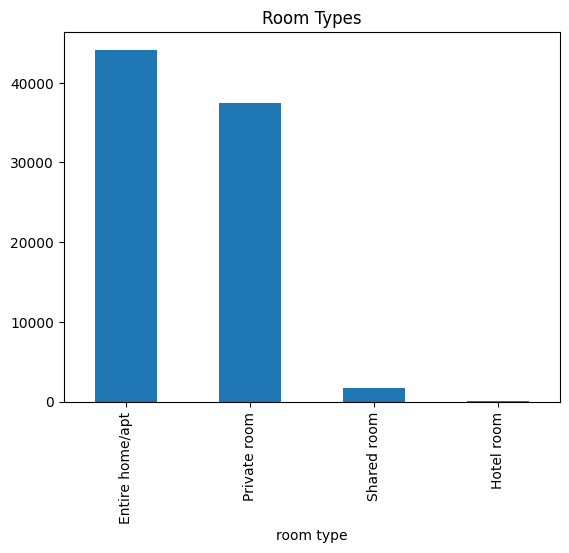

In [15]:
#What are the different property types in the dataset?
print(df['room type'].unique())
df['room type'].value_counts().plot(kind='bar')
plt.title("Room Types")
plt.show()


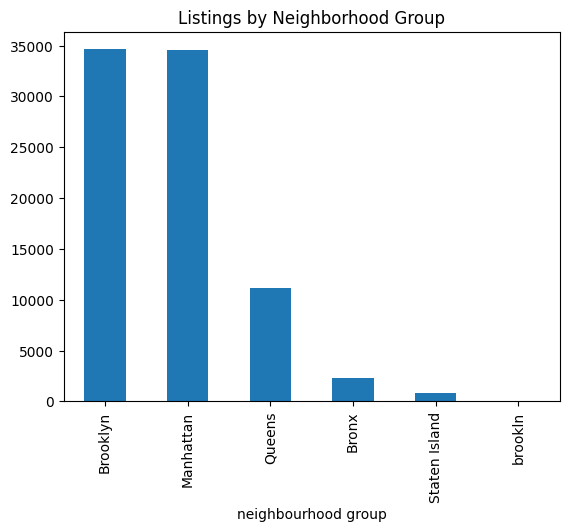

In [16]:
#Which neighborhood group has the highest number of listings?
df['neighbourhood group'].value_counts().plot(kind='bar')
plt.title("Listings by Neighborhood Group")
plt.show()
# Manhattan and Brooklyndominates the market in terms of listing count, likely due to higher demand, tourism, and business activity.

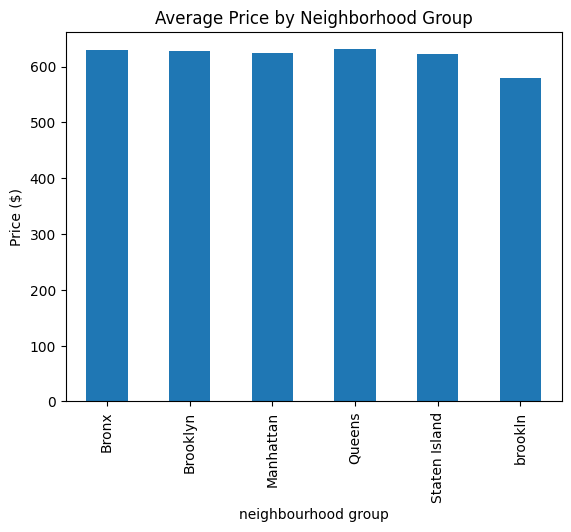

In [17]:
#Which neighborhood group has the highest average prices for Airbnb listings?
df.groupby('neighbourhood group')['price_$'].mean().plot(kind='bar')
plt.title("Average Price by Neighborhood Group")
plt.ylabel("Price ($)")
plt.show()
# The Manhattan neighborhood group has the highest average prices for Airbnb listings, as shown by the price distribution graph. Listings in Manhattan are consistently more expensive than those in Brooklyn, Queens, Bronx, or Staten Island.

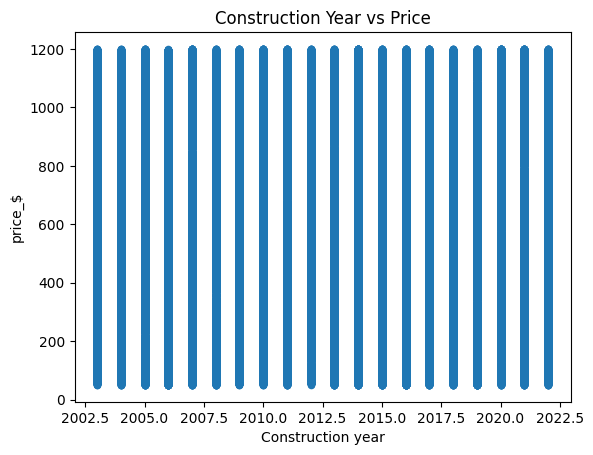

In [18]:
# Is there a relationship between the construction year of property and price?
df.plot.scatter(x='Construction year', y='price_$')
plt.title("Construction Year vs Price")
plt.show()

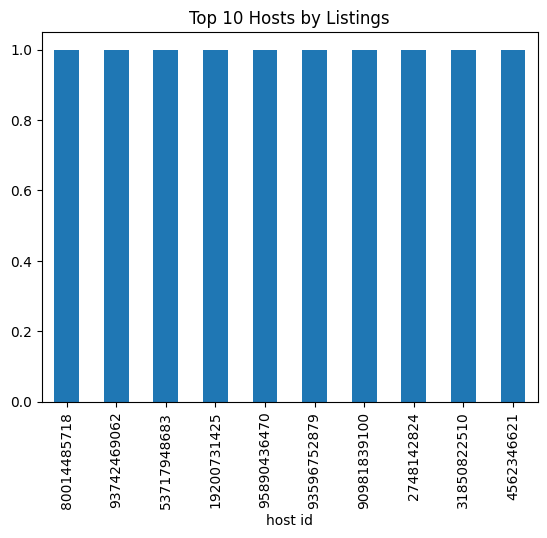

In [19]:
# Who are the top 10 hosts by calculated host listing count?
df['host id'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Hosts by Listings")
plt.show()

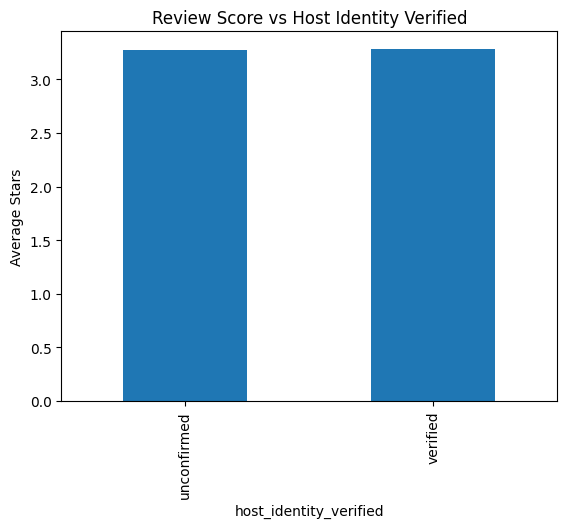

In [20]:
# Are hosts with verified identities more likely to receive positive reviews?
df.groupby('host_identity_verified')['review rate number'].mean().plot(kind='bar')
plt.title("Review Score vs Host Identity Verified")
plt.ylabel("Average Stars")
plt.show()

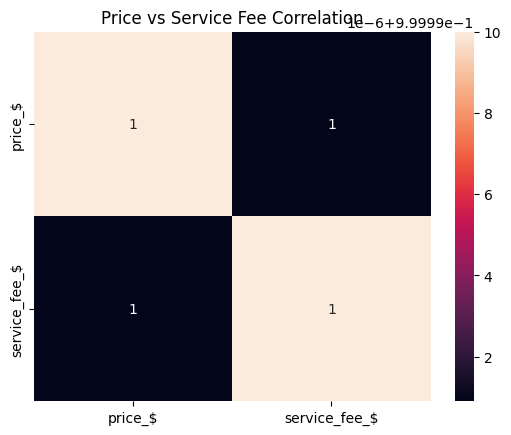

In [21]:
# Is there a correlation between the price of a listing and its service fee?
sns.heatmap(df[['price_$','service_fee_$']].corr(), annot=True)
plt.title("Price vs Service Fee Correlation")
plt.show()

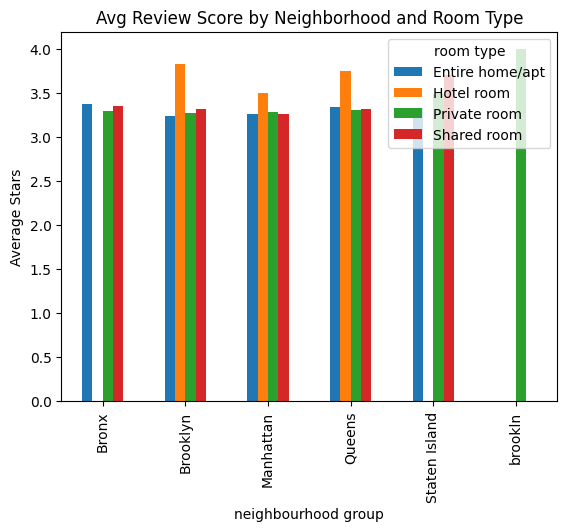

In [22]:
# What is the average review rate number (e.g., stars) for listings, and does it vary based on the neighborhood group and room type?
df.groupby(['neighbourhood group','room type'])['review rate number'].mean().unstack().plot(kind='bar')
plt.title("Avg Review Score by Neighborhood and Room Type")
plt.ylabel("Average Stars")
plt.show()

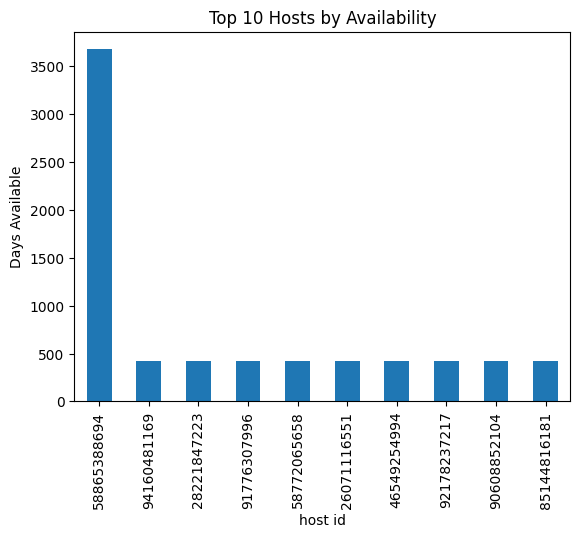

In [23]:
# Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
df.groupby('host id')['availability 365'].mean().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title("Top 10 Hosts by Availability")
plt.ylabel("Days Available")
plt.show()